In [42]:
# Some useful links
# http://andrewgaidus.com/Analyzing_Race_Results_Part_2/
# https://towardsdatascience.com/pandas-tips-and-tricks-33bcc8a40bb9
# https://stackoverflow.com/questions/47303027/changing-axis-ticks-in-seaborn-stripplotwhere-x-value-is-a-time-stamp?rq=1
# https://stackoverflow.com/questions/22408237/named-colors-in-matplotlib
# https://shocksolution.com/2011/08/17/removing-an-axis-or-both-axes-from-a-matplotlib-plot/
# http://www.datasciencemadesimple.com/rank-dataframe-python-pandas-min-max-dense-rank-group/
# http://www.r-graph-gallery.com/38-rcolorbrewers-palettes/
# https://seaborn.pydata.org/tutorial.html
# https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html
# http://colorbrewer2.org/#type=sequential&scheme=OrRd&n=3

In [1]:
import pandas as pd
from decimal import Decimal, ROUND_UP, ROUND_DOWN, ROUND_HALF_UP
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Widen display area to prevent column wrapping
pd.set_option('display.width', 2000)

In [3]:
df = pd.read_csv( "losinj_full_nogaps.csv" )
df = df.dropna() # remove DNF/DNS

In [1]:
# df.set_index('Name')
# df.rename(columns={'': 'A'}, inplace=True)
# df.reindex_axis(sorted(df.columns), axis=1)

In [4]:
print( df.head() )

   Rank  Number               Name  Split1  Split2   Split3   Split4     Time
0     1       1         GWIN Aaron  20.810   52.86  01:20.8  01:56.5  02:19.2
1     2      13          SHAW Luca  20.613  54.162  01:22.8  01:58.1  02:20.0
2     3      16         LUCAS Dean  20.680  53.964  01:21.9  01:57.8  02:20.3
3     4      19  BLENKINSOP Samuel  21.224  54.699  01:22.9  01:58.7  02:21.1
4     5      34     NORTON Dakotah  20.904  54.898  01:23.2  01:59.1  02:21.8


In [18]:
# from datetime import timedelta

In [38]:
print( df.Split1.max(), df.Split1.min() )

25.362 20.613


In [1073]:
# Calculate split diff compared to split leader
df.insert( loc=4, column='s1b', value=df.Split1 - df.Split1.min() )

ValueError: cannot insert s1b, already exists

In [262]:
print( df.tail() )

    Rank  Number                 Name  Split1   Split2   Split3   Split4     Time
57    58      70    COLOMBO Francesco  21.563   56.967  01:40.1  02:19.4  02:43.4
58    59      72           WEBER Lutz  21.527   58.627  01:31.6  02:20.3  02:48.5
59    60     116  SUAREZ ALONSO Angel  21.978   57.445  01:34.7  02:35.4  03:06.8
60    61      93          NEWELL Jake  25.362  01:18.9  02:11.6  03:09.4  03:36.7
61    62     151       CIRIEGO Maxime  21.775   57.355  02:13.9  03:18.5  03:46.4


In [34]:
df.Split1[0]

20.809999999999999

In [58]:
# Calculate split diff compared to race winner
df.insert( loc=5, column='s1w', value=df.Split1 - df.Split1[0] )
# df['s1w'] = df.Split1 - df.Split1[0]

In [1076]:
print( df.head() )

   Rank  Number               Name  Split1  Split2   Split3   Split4     Time
0     1       1         GWIN Aaron  20.810   52.86  01:20.8  01:56.5  02:19.2
1     2      13          SHAW Luca  20.613  54.162  01:22.8  01:58.1  02:20.0
2     3      16         LUCAS Dean  20.680  53.964  01:21.9  01:57.8  02:20.3
3     4      19  BLENKINSOP Samuel  21.224  54.699  01:22.9  01:58.7  02:21.1
4     5      34     NORTON Dakotah  20.904  54.898  01:23.2  01:59.1  02:21.8


In [62]:
df.insert( loc=7, column='s2b', value=df.Split2 - df.Split2.min())
df.insert( loc=8, column='s2w', value=df.Split2 - df.Split2[0] )

TypeError: '<=' not supported between instances of 'str' and 'float'

In [5]:
df.set_index('Name')

,Rank,Number,Split1,Split2,Split3,Split4,Time
Name,,,,,,,
GWIN Aaron,1,1,20.810,52.86,01:20.8,01:56.5,02:19.2
SHAW Luca,2,13,20.613,54.162,01:22.8,01:58.1,02:20.0
LUCAS Dean,3,16,20.680,53.964,01:21.9,01:57.8,02:20.3
BLENKINSOP Samuel,4,19,21.224,54.699,01:22.9,01:58.7,02:21.1
NORTON Dakotah,5,34,20.904,54.898,01:23.2,01:59.1,02:21.8
MOIR Jack,6,7,21.293,54.912,01:23.0,01:59.3,02:22.1
GREENLAND Laurie,7,9,21.152,54.779,01:23.4,01:59.6,02:22.2
VERGIER Loris,8,5,21.076,56.543,01:24.3,02:00.0,02:22.3
BROSNAN Troy,9,2,21.022,55.352,01:23.6,02:00.0,02:22.4


In [1071]:
foo = df.loc[df['Name'] == 'NEWELL Jake']['Split2']
print( foo )

60    01:18.9
Name: Split2, dtype: object


In [6]:
def convertToSeconds( timestring ):
    if ":" in str(timestring):
        minutes, seconds = timestring.split(':')
        timestring = int(minutes)*60 + float(seconds)
    if ( timestring in [ "DNS", "DNF" ] ):
        timestring = float('NaN')
    return float(timestring)

In [81]:
convertToSeconds( "01:18.9" )

78.9

In [80]:
convertToSeconds( "57.445" )

57.445

In [7]:
df['s1s'] = [ convertToSeconds(x) for x in df['Split1'] ]
df['s2s'] = [ convertToSeconds(x) for x in df['Split2'] ]
df['s3s'] = [ convertToSeconds(x) for x in df['Split3'] ]
df['s4s'] = [ convertToSeconds(x) for x in df['Split4'] ]
df['fs'] = [ convertToSeconds(x) for x in df['Time'] ]

In [8]:
print( df.tail() )

    Rank  Number                 Name  Split1   Split2   Split3   Split4     Time     s1s     s2s    s3s    s4s     fs
57    58      70    COLOMBO Francesco  21.563   56.967  01:40.1  02:19.4  02:43.4  21.563  56.967  100.1  139.4  163.4
58    59      72           WEBER Lutz  21.527   58.627  01:31.6  02:20.3  02:48.5  21.527  58.627   91.6  140.3  168.5
59    60     116  SUAREZ ALONSO Angel  21.978   57.445  01:34.7  02:35.4  03:06.8  21.978  57.445   94.7  155.4  186.8
60    61      93          NEWELL Jake  25.362  01:18.9  02:11.6  03:09.4  03:36.7  25.362  78.900  131.6  189.4  216.7
61    62     151       CIRIEGO Maxime  21.775   57.355  02:13.9  03:18.5  03:46.4  21.775  57.355  133.9  198.5  226.4


In [96]:
if ( "DS" in [ "DNS", "DNF" ] ):
    print ("hello")

In [9]:
def convertToDelta( timestring ):
#     if ( timestring in [ "DNS", "DNF" ] ):
#         timestring = "0:0:0.0"
#         return timestring
    timestring = str(timestring)

    if ":" not in timestring:
        timestring = str(Decimal( timestring ).quantize( Decimal('.001' ), rounding=ROUND_HALF_UP ))
        timestring = "0:" + timestring

    timestring = "0:" + timestring

    return pd.to_timedelta( timestring )
#     return timestring

In [254]:
convertToDelta( "01:18.9" )

Timedelta('0 days 00:01:18.900000')

In [255]:
convertToDelta( 57.445 )

Timedelta('0 days 00:00:57.445000')

In [269]:
# rounding issues
pd.to_timedelta( "0:0:21.526999999999997" )

Timedelta('0 days 00:00:21')

In [277]:
# Alternative to Decimal conversion to deal with floating point inaccuracy
n = 21.526999999999997
'%.3f' % round( n, 3 )

'21.527'

In [257]:
convertToDelta( 21.527 )

Timedelta('0 days 00:00:21.527000')

In [250]:
convertToDelta( 20.613 )

Timedelta('0 days 00:00:20.613000')

In [10]:
df['s1s'] = [ convertToDelta(x) for x in df['Split1'] ]
df['s1cr'] = df.s1s.rank(method='dense')
df['s1b'] = (df.s1s - df.s1s.min()).dt.total_seconds()
df['s1w'] = (df.s1s - df.s1s[0]).dt.total_seconds()
df['s2s'] = [ convertToDelta(x) for x in df['Split2'] ]
df['s2c'] = df.s2s - df.s1s
df['s2cr'] = df.s2c.rank(method='dense')
df['s2b'] = (df.s2s - df.s2s.min()).dt.total_seconds()
df['s2w'] = (df.s2s - df.s2s[0]).dt.total_seconds()
df['s2cb'] = (df.s2c - df.s2c.min()).dt.total_seconds()
df['s2cw'] = (df.s2c - df.s2c[0]).dt.total_seconds()
df['s3s'] = [ convertToDelta(x) for x in df['Split3'] ]
df['s3c'] = df.s3s - df.s2s
df['s3cr'] = df.s3c.rank(method='dense')
df['s3b'] = (df.s3s - df.s3s.min()).dt.total_seconds()
df['s3w'] = (df.s3s - df.s3s[0]).dt.total_seconds()
df['s3cb'] = (df.s3c - df.s3c.min()).dt.total_seconds()
df['s3cw'] = (df.s3c - df.s3c[0]).dt.total_seconds()
df['s4s'] = [ convertToDelta(x) for x in df['Split4'] ]
df['s4c'] = df.s4s - df.s3s
df['s4cr'] = df.s4c.rank(method='dense')
df['s4b'] = (df.s4s - df.s4s.min()).dt.total_seconds()
df['s4w'] = (df.s4s - df.s4s[0]).dt.total_seconds()
df['s4cb'] = (df.s4c - df.s4c.min()).dt.total_seconds()
df['s4cw'] = (df.s4c - df.s4c[0]).dt.total_seconds()
df['fs'] = [ convertToDelta(x) for x in df['Time'] ]
df['s5s'] = df['fs']
df['s5c'] = df.fs - df.s4s
df['s5cr'] = df.s5c.rank(method='dense')
df['s5b'] = (df.s5s - df.s5s.min()).dt.total_seconds()
df['s5w'] = (df.s5s - df.s5s[0]).dt.total_seconds()
df['s5cb'] = (df.s5c - df.s5c.min()).dt.total_seconds()
df['s5cw'] = (df.s5c - df.s5c[0]).dt.total_seconds()

In [11]:
pd.set_option('display.max_columns', None)
display( df.head(10) )
# print( df.tail() )

,Rank,Number,Name,Split1,Split2,Split3,Split4,Time,s1s,s2s,s3s,s4s,fs,s1cr,s1b,s1w,s2c,s2cr,s2b,s2w,s2cb,s2cw,s3c,s3cr,s3b,s3w,s3cb,s3cw,s4c,s4cr,s4b,s4w,s4cb,s4cw,s5s,s5c,s5cr,s5b,s5w,s5cb,s5cw
0,1,1,GWIN Aaron,20.810,52.86,01:20.8,01:56.5,02:19.2,00:00:20.810000,00:00:52.860000,00:01:20.800000,00:01:56.500000,00:02:19.200000,6.0,0.197,0.000,00:00:32.050000,1.0,0.000,0.000,0.000,0.000,00:00:27.940000,5.0,0.0,0.0,0.183,0.000,00:00:35.700000,2.0,0.0,0.0,0.4,0.0,00:02:19.200000,00:00:22.700000,6.0,0.0,0.0,0.8,0.0
1,2,13,SHAW Luca,20.613,54.162,01:22.8,01:58.1,02:20.0,00:00:20.613000,00:00:54.162000,00:01:22.800000,00:01:58.100000,00:02:20,1.0,0.000,-0.197,00:00:33.549000,6.0,1.302,1.302,1.499,1.499,00:00:28.638000,12.0,2.0,2.0,0.881,0.698,00:00:35.300000,1.0,1.6,1.6,0.0,-0.4,00:02:20,00:00:21.900000,1.0,0.8,0.8,0.0,-0.8
2,3,16,LUCAS Dean,20.680,53.964,01:21.9,01:57.8,02:20.3,00:00:20.680000,00:00:53.964000,00:01:21.900000,00:01:57.800000,00:02:20.300000,2.0,0.067,-0.130,00:00:33.284000,3.0,1.104,1.104,1.234,1.234,00:00:27.936000,4.0,1.1,1.1,0.179,-0.004,00:00:35.900000,4.0,1.3,1.3,0.6,0.2,00:02:20.300000,00:00:22.500000,4.0,1.1,1.1,0.6,-0.2
3,4,19,BLENKINSOP Samuel,21.224,54.699,01:22.9,01:58.7,02:21.1,00:00:21.224000,00:00:54.699000,00:01:22.900000,00:01:58.700000,00:02:21.100000,16.0,0.611,0.414,00:00:33.475000,5.0,1.839,1.839,1.425,1.425,00:00:28.201000,7.0,2.1,2.1,0.444,0.261,00:00:35.800000,3.0,2.2,2.2,0.5,0.1,00:02:21.100000,00:00:22.400000,3.0,1.9,1.9,0.5,-0.3
4,5,34,NORTON Dakotah,20.904,54.898,01:23.2,01:59.1,02:21.8,00:00:20.904000,00:00:54.898000,00:01:23.200000,00:01:59.100000,00:02:21.800000,9.0,0.291,0.094,00:00:33.994000,12.0,2.038,2.038,1.944,1.944,00:00:28.302000,10.0,2.4,2.4,0.545,0.362,00:00:35.900000,4.0,2.6,2.6,0.6,0.2,00:02:21.800000,00:00:22.700000,6.0,2.6,2.6,0.8,0.0
5,6,7,MOIR Jack,21.293,54.912,01:23.0,01:59.3,02:22.1,00:00:21.293000,00:00:54.912000,00:01:23,00:01:59.300000,00:02:22.100000,18.0,0.680,0.483,00:00:33.619000,7.0,2.052,2.052,1.569,1.569,00:00:28.088000,6.0,2.2,2.2,0.331,0.148,00:00:36.300000,6.0,2.8,2.8,1.0,0.6,00:02:22.100000,00:00:22.800000,7.0,2.9,2.9,0.9,0.1
6,7,9,GREENLAND Laurie,21.152,54.779,01:23.4,01:59.6,02:22.2,00:00:21.152000,00:00:54.779000,00:01:23.400000,00:01:59.600000,00:02:22.200000,14.0,0.539,0.342,00:00:33.627000,8.0,1.919,1.919,1.577,1.577,00:00:28.621000,11.0,2.6,2.6,0.864,0.681,00:00:36.200000,5.0,3.1,3.1,0.9,0.5,00:02:22.200000,00:00:22.600000,5.0,3.0,3.0,0.7,-0.1
7,8,5,VERGIER Loris,21.076,56.543,01:24.3,02:00.0,02:22.3,00:00:21.076000,00:00:56.543000,00:01:24.300000,00:02:00,00:02:22.300000,11.0,0.463,0.266,00:00:35.467000,40.0,3.683,3.683,3.417,3.417,00:00:27.757000,1.0,3.5,3.5,0.000,-0.183,00:00:35.700000,2.0,3.5,3.5,0.4,0.0,00:02:22.300000,00:00:22.300000,2.0,3.1,3.1,0.4,-0.4
8,9,2,BROSNAN Troy,21.022,55.352,01:23.6,02:00.0,02:22.4,00:00:21.022000,00:00:55.352000,00:01:23.600000,00:02:00,00:02:22.400000,10.0,0.409,0.212,00:00:34.330000,18.0,2.492,2.492,2.280,2.280,00:00:28.248000,8.0,2.8,2.8,0.491,0.308,00:00:36.400000,7.0,3.5,3.5,1.1,0.7,00:02:22.400000,00:00:22.400000,3.0,3.2,3.2,0.5,-0.3
9,10,6,HART Danny,20.704,54.741,01:22.5,01:59.4,02:23.0,00:00:20.704000,00:00:54.741000,00:01:22.500000,00:01:59.400000,00:02:23,3.0,0.091,-0.106,00:00:34.037000,13.0,1.881,1.881,1.987,1.987,00:00:27.759000,2.0,1.7,1.7,0.002,-0.181,00:00:36.900000,11.0,2.9,2.9,1.6,1.2,00:02:23,00:00:23.600000,14.0,3.8,3.8,1.7,0.9


In [290]:
# df['s1b'] = df.s1s - df.s1s.min()

In [12]:
df.s1w.min()

-0.19700000000000001

In [23]:
def drawScatter( col, title, xmin=7, xmax=-.5 ):
    df2 = df.sort_values(col, ascending=True)
    df2 = df2.reset_index(drop=True)
    plt.subplots(figsize=(5,7))
    
#     colors = ["gold","silver","peru"] + ["cornflowerblue"]*(len(df2[col])-3)
    colors = ["cornflowerblue"]*(len(df2[col]))
    colors[int(df2.loc[df2['Rank'] == 1].index.values)] = "gold"
    colors[int(df2.loc[df2['Rank'] == 2].index.values)] = "silver"
    colors[int(df2.loc[df2['Rank'] == 3].index.values)] = "peru"
    sizes = [40]*(len(df2[col]))
    sizes[int(df2.loc[df2['Rank'] == 1].index.values)] = 100
    sizes[int(df2.loc[df2['Rank'] == 2].index.values)] = 100
    sizes[int(df2.loc[df2['Rank'] == 3].index.values)] = 100
    
#     print( colors )
#     return
    
    plot = sns.regplot( y=df2.index.values[0:20], x=df2[col][0:20], fit_reg=False, scatter_kws={"color":colors, "s":sizes} )
    plot.invert_yaxis()
    plot.invert_xaxis()
    plt.xlim( xmin, xmax )

    # Chart formatting
    sns.despine()
#     plot.axis('off')
    plot.yaxis.set_visible(False)
    plot.set_frame_on(False)

    sns.set_style('whitegrid')
    plot.grid( color='#EEEEEE', linewidth=1.0 )
    plot.set( xlabel=title )

    # Name column
    coln = "s" + col[1:2] + ( "s" if col[2:3] == "b" else "c" )
    display( coln )

    # Adding point labels
    for row in range( 0, 20 ):
        label = df2.Name[row] + " " + ( formatDelta( df2[coln][row] ) if row==0 else "+" + str(df2[col][row]) )
        x = df2[col][row] + .2
        y = df2.index.values[row] + 0.15
        plot.text( x, y, label, horizontalalignment='right', size='small' )

In [14]:
# int(df.loc[df['Rank'] == 2]['Number'])
int(df2.loc[df2['Rank'] == 1].index.values)

NameError: name 'df2' is not defined

In [15]:
def formatDelta( time ):
    return ':'.join(str(time).split(':')[1:3])[:-3]

# print( formatDelta( "00:00:32.050000" ) )

In [16]:
colors =  ["#91FF61"]*25 + ["#BA61FF"]*25 + ["#91FF61"]*25 + ["#BA61FF"]*25
colors = ["blue"]*len(df2[col])

print( colors)

NameError: name 'df2' is not defined

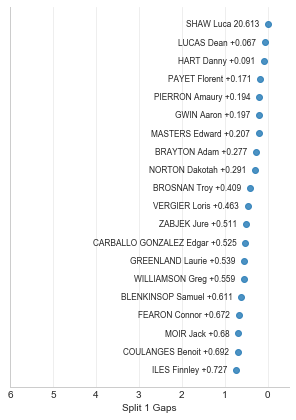

In [799]:
df2 = df.sort_values('s1b', ascending=True)
df2 = df2.reset_index(drop=True)
plt.subplots(figsize=(5,7))
plot = sns.regplot( y=df2.index.values[0:20], x=df2['s1b'][0:20], fit_reg=False )
plot.invert_yaxis()
plot.invert_xaxis()
plt.xlim( 6, -.5 )
# plt.ylim( 20, 0 )

# Chart formatting
sns.despine()
plot.get_yaxis().set_visible(False)
# plot.grid( b=True, which='major', color='#EEEEEE', linewidth=1.0 )
sns.set_style('whitegrid')
plot.grid( color='#EEEEEE', linewidth=1.0 )
plot.set( xlabel="Split 1 Gaps" )

# Adding point labels
# plot.text( df2.s1b.min() + 0.02, 0.2, df2.Name[0] + " " +str(df2.s1s.min().total_seconds() ), horizontalalignment='right', size='small' )
for row in range( 0, 20 ):
    plot.text( df2.s1b[row] + .2, df2.index.values[row] + 0.15, df2.Name[row] + " " + str( '%.3f' % round( df2.s1s[row].total_seconds(), 3 ) if row==0 else "+" + str(df2.s1b[row]) ) , horizontalalignment='right', size='small'  )

's1s'

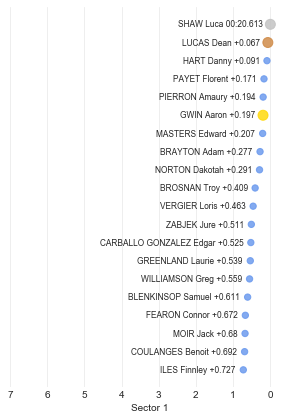

In [24]:
drawScatter( 's1b', 'Sector 1')

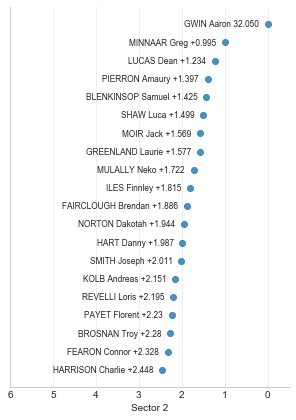

In [697]:
df2 = df.sort_values('s2cb', ascending=True)
df2 = df2.reset_index(drop=True)
plt.subplots(figsize=(5,7))
plot = sns.regplot( y=df2.index.values[0:20], x=df2['s2cb'][0:20], fit_reg=False )
plot.invert_yaxis()
plot.invert_xaxis()
plt.xlim( 6, -.5 )
# plt.ylim( 20, 0 )

# Chart formatting
sns.despine()
plot.get_yaxis().set_visible(False)
# plot.grid( b=True, which='major', color='#EEEEEE', linewidth=1.0 )
sns.set_style('whitegrid')
plot.grid( color='#EEEEEE', linewidth=1.0 )
plot.set( xlabel="Sector 2" )

# Adding point labels
# plot.text( df2.s1b.min() + 0.02, 0.2, df2.Name[0] + " " +str(df2.s1s.min().total_seconds() ), horizontalalignment='right', size='small' )
for row in range( 0, 20 ):
    plot.text( df2.s2cb[row] + .2, df2.index.values[row] + 0.15, df2.Name[row] + " " + str( '%.3f' % round( df2.s2c[row].total_seconds(), 3 ) if row==0 else "+" + str(df2.s2cb[row]) ) , horizontalalignment='right', size='small'  )

's2c'

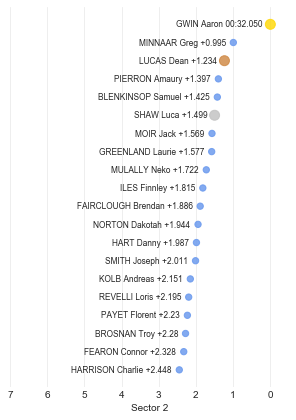

In [25]:
drawScatter( 's2cb', 'Sector 2' )

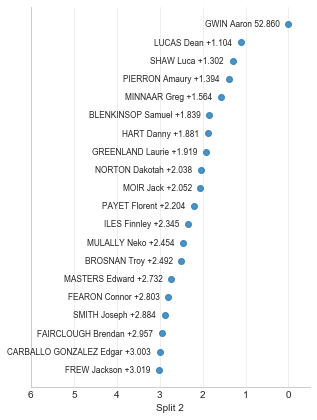

In [699]:
df2 = df.sort_values('s2b', ascending=True)
df2 = df2.reset_index(drop=True)
plt.subplots(figsize=(5,7))
plot = sns.regplot( y=df2.index.values[0:20], x=df2['s2b'][0:20], fit_reg=False )
plot.invert_yaxis()
plot.invert_xaxis()
plt.xlim( 6, -.5 )
# plt.ylim( 20, 0 )

# Chart formatting
sns.despine()
plot.get_yaxis().set_visible(False)
# plot.grid( b=True, which='major', color='#EEEEEE', linewidth=1.0 )
sns.set_style('whitegrid')
plot.grid( color='#EEEEEE', linewidth=1.0 )
plot.set( xlabel="Split 2" )

# Adding point labels
for row in range( 0, 20 ):
    plot.text( df2.s2b[row] + .2, df2.index.values[row] + 0.15, df2.Name[row] + " " + str( '%.3f' % round( df2.s2s[row].total_seconds(), 3 ) if row==0 else "+" + str(df2.s2b[row]) ) , horizontalalignment='right', size='small'  )

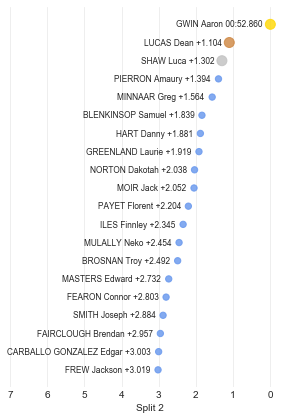

In [1034]:
drawScatter( 's2b', 'Split 2' )

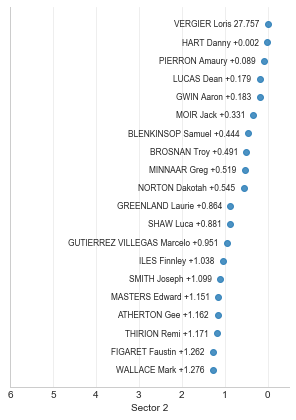

In [702]:
df2 = df.sort_values('s3cb', ascending=True)
df2 = df2.reset_index(drop=True)
plt.subplots(figsize=(5,7))
plot = sns.regplot( y=df2.index.values[0:20], x=df2['s3cb'][0:20], fit_reg=False )
plot.invert_yaxis()
plot.invert_xaxis()
plt.xlim( 6, -.5 )
# plt.ylim( 20, 0 )

# Chart formatting
sns.despine()
plot.get_yaxis().set_visible(False)
# plot.grid( b=True, which='major', color='#EEEEEE', linewidth=1.0 )
sns.set_style('whitegrid')
plot.grid( color='#EEEEEE', linewidth=1.0 )
plot.set( xlabel="Sector 2" )

# Adding point labels
# plot.text( df2.s1b.min() + 0.02, 0.2, df2.Name[0] + " " +str(df2.s1s.min().total_seconds() ), horizontalalignment='right', size='small' )
for row in range( 0, 20 ):
    plot.text( df2.s3cb[row] + .2, df2.index.values[row] + 0.15, df2.Name[row] + " " + str( '%.3f' % round( df2.s3c[row].total_seconds(), 3 ) if row==0 else "+" + str(df2.s3cb[row]) ) , horizontalalignment='right', size='small'  )

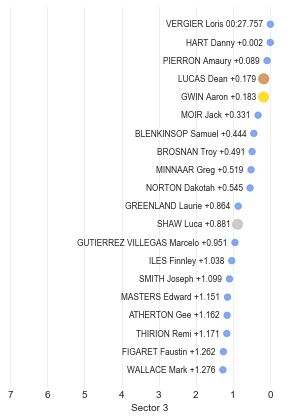

In [1035]:
drawScatter( 's3cb', 'Sector 3' )

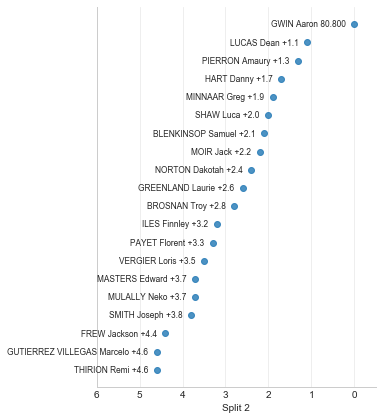

In [706]:
df2 = df.sort_values('s3b', ascending=True)
df2 = df2.reset_index(drop=True)
plt.subplots(figsize=(5,7))
plot = sns.regplot( y=df2.index.values[0:20], x=df2['s3b'][0:20], fit_reg=False )
plot.invert_yaxis()
plot.invert_xaxis()
plt.xlim( 6, -.5 )
# plt.ylim( 20, 0 )

# Chart formatting
sns.despine()
plot.get_yaxis().set_visible(False)
# plot.grid( b=True, which='major', color='#EEEEEE', linewidth=1.0 )
sns.set_style('whitegrid')
plot.grid( color='#EEEEEE', linewidth=1.0 )
plot.set( xlabel="Split 2" )

# Adding point labels
col = 's3b'
for row in range( 0, 20 ):
    plot.text( df2[col][row] + .2, df2.index.values[row] + 0.15, df2.Name[row] + " " + str( '%.3f' % round( df2.s3s[row].total_seconds(), 3 ) if row==0 else "+" + str(df2.s3b[row]) ) , horizontalalignment='right', size='small'  )

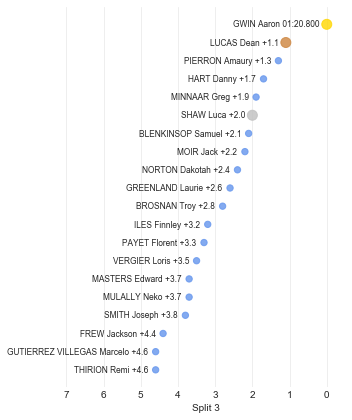

In [1036]:
drawScatter( 's3b', 'Split 3' )

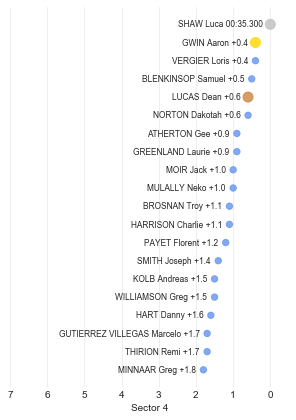

In [1040]:
drawScatter( 's4cb', 'Sector 4' )

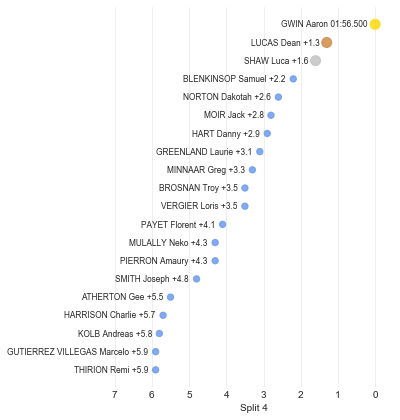

In [1037]:
drawScatter( 's4b', 'Split 4' )

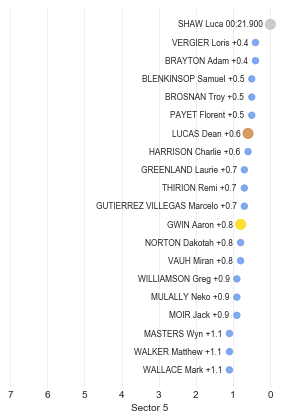

In [1039]:
drawScatter( 's5cb', 'Sector 5' )

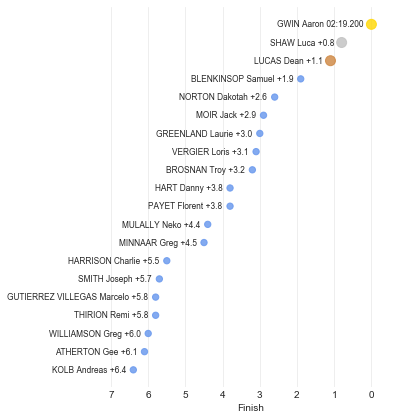

In [1138]:
drawScatter( 's5b', 'Finish' )

In [20]:
dfRank = df[['s1cr', 's2cr', 's3cr', 's4cr', 's5cr']][:20].copy()
dfRank

,s1cr,s2cr,s3cr,s4cr,s5cr
0,6.0,1.0,5.0,2.0,6.0
1,1.0,6.0,12.0,1.0,1.0
2,2.0,3.0,4.0,4.0,4.0
3,16.0,5.0,7.0,3.0,3.0
4,9.0,12.0,10.0,4.0,6.0
5,18.0,7.0,6.0,6.0,7.0
6,14.0,8.0,11.0,5.0,5.0
7,11.0,40.0,1.0,2.0,2.0
8,10.0,18.0,8.0,7.0,3.0
9,3.0,13.0,2.0,11.0,14.0


[Text(0.5,55.5,'Sector')]

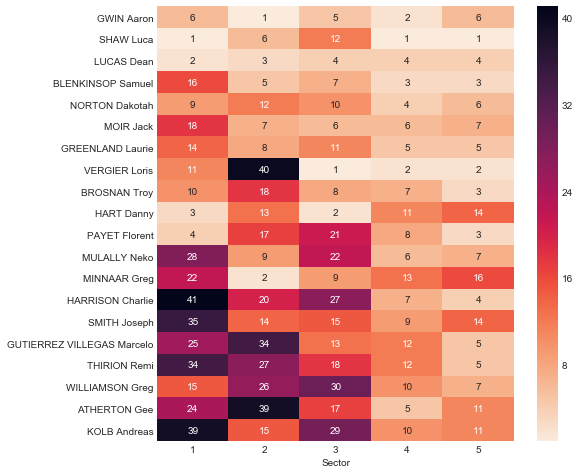

In [21]:
# https://seaborn.pydata.org/generated/seaborn.heatmap.html

plt.figure(figsize=(8, 8))
cmap = sns.cm.rocket_r
map = sns.heatmap(dfRank, annot=True, yticklabels=df.Name[:20], xticklabels=[1,2,3,4,5], cmap=cmap)
# viridis, YlOrRd
# , annot_kws={"size": 20}
# , linewidth=1
map.set( xlabel="Sector" )

In [39]:
splits = 5
topX = 20
dfSplitRank = df[['s1cr', 's2cr', 's3cr', 's4cr', 's5cr']][:topX].copy()
labelY = df['Name'][:topX].values.tolist()


In [41]:
cycler(color=['rgb']) * cycler(linestyle=['-','--',':'])

'rgb','-'
'rgb','--'
'rgb',':'


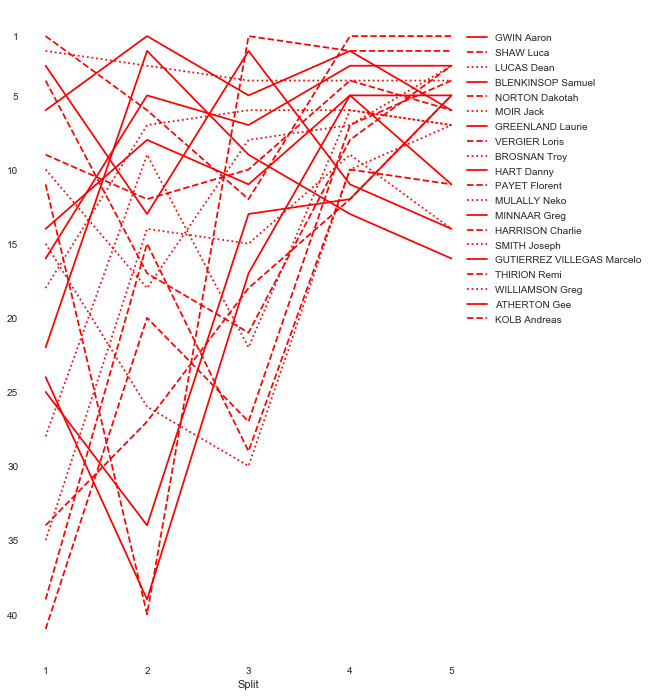

In [40]:
import matplotlib as mpl
from cycler import cycler

mpl.style.use('seaborn')
# default_cycler = cycler('color', ['r', 'g', 'b', 'y']) + cycler('linestyle', ['-', '--', ':', '-.'])
cyc = cycler(color='bgrcmykbgrcmykbgrcmy') + cycler(linestyle='-------:::::::------')

cyc = cycler(color=['r']) * cycler(linestyle=['-','--',':'])

mpl.rcParams['axes.prop_cycle'] = cyc

# ax.set_prop_cycle(cycler(color=plt.get_cmap('tab20c').colors))

pltX = 1.6 * splits
pltY = 6 * ( topX / 10 )

# fig, ax = plt.subplots()

data = dfSplitRank.T
fig = plt.figure( figsize=(pltX, pltY) )
plt.plot( data, label=True )
# plt.plot( data )
ax = plt.gca()

# ax.set_prop_cycle(None)

ax.invert_yaxis()

# plt.set_cmap(plt.get_cmap('OrRd'))


plt.box(on=None)

plt.xlabel( "Split")
# locs, labels = plt.yticks()

maxY = int(dfSplitRank['s1cr'].max()+1)
plt.yticks( [1]+list(range( 5, maxY, 5 )), [1]+list(range( 5, maxY, 5 )) )

plt.xticks( range( 0, splits ), range( 1, splits+1 ) )
plt.grid( False, which='major', axis='y' )

handles, labels = ax.get_legend_handles_labels()
ax.legend( handles, labelY, loc=1, labelspacing=0.58, bbox_to_anchor=(1.4, 0.972)) #, handletextpad=1

# n = 6w
# color = plt.cm.coolwarm(np.linspace(0.1,0.9,n)) # This returns RGBA; convert:
# hexcolor = map(lambda rgb:'#%02x%02x%02x' % (rgb[0]*255,rgb[1]*255,rgb[2]*255),tuple(color[:,0:-1]))
# mpl.rcParams['axes.color_cycle'] = hexcolor

# mpl.rcParams['image.cmap'] = 'jet'

# from cycler import cycler





# plt.tight_layout()
plt.show()


In [4]:
# *Meant* to allow labellign each line on the chart
for i in range( 1, splits+1 ):
    col = 'split' + str(i) + ( '_sector' if i > 1 else '' )
    display( df[col].min() )

NameError: name 'df' is not defined